In [1]:
import random as rd
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mu1 = -1
mu2 = 3
sig1 = 0.5
sig2 = 1
N = 100
np.random.seed(10)
x11=np.random.randn(N,1)*sig1 + mu1
x12=np.random.randn(N,1)*sig1 + mu1+3
x21=np.random.randn(N,1)*sig2 + mu2
x22=np.random.randn(N,1)*sig2 + mu2+3
c = np.vstack((-np.ones((N,1)), np.ones((N,1))))
x1 = np.hstack((x11,x12))
x2 = np.hstack((x21,x22))

X = np.hstack( (np.vstack( (x1,x2) ),c) )
np.random.shuffle(X)
dataset = pd.DataFrame(data=X, columns=['x','y','c'])


## Pseudo code used: pseudo code in class 


In [3]:
dataset.head()

,x,y,c
0,-0.334207,2.058738,-1.0
1,3.264395,5.636814,1.0
2,-0.669884,1.856185,-1.0
3,1.995284,4.484924,1.0
4,3.588041,4.739172,1.0


In [13]:
Dataset=dataset.drop('c', axis=1)

In [14]:
Dataset.insert(0,'const',np.ones_like(Dataset['x']))

In [15]:
Dataset.head()

,const,x,y
0,1.0,-0.334207,2.058738
1,1.0,3.264395,5.636814
2,1.0,-0.669884,1.856185
3,1.0,1.995284,4.484924
4,1.0,3.588041,4.739172


In [4]:
def get_gradient(vectors,coeffs):
    '''This function computes the gradient of the loss function in the predictions'''
    return -sum([coeffs[i]*vectors[i] for i in range(len(coeffs))]) #This is the formula for the gredient of 
#the loss function

In [5]:
def new_w(data,w,true_val):
    '''This function uses the gradient given by the above get_gredient function
    to update the parameter w until we reach the desired level of accuracy in our
    predictions'''
    alpha=0.001 # Learning rate used to search for the optimal w
    y_hat=[] # Initializing the list to contain the predictions at each value of w 
    for i in range(data.shape[0]): # Loop for computing the predictions
        y_hat.append(np.sign(w.dot(np.array(data.iloc[i,:])))) 
    Misclassified_indices=[] # Initializing the list to contain the indices of the misclassified data points
    for i in range(len(y_hat)):
        if y_hat[i]!=true_val[i]: # We go through the predicted values and the true values to collect the 
            #indices of the misclassified points
            Misclassified_indices.append(i)
    if len(Misclassified_indices)>0: #If there are misclassified points, then we compute the gradient and update w
        gradient=get_gradient(np.array([data.iloc[j,:] for j in Misclassified_indices]),np.array([true_val[j] for j in Misclassified_indices]))
    else:
        gradient=np.zeros_like(data.iloc[0,:])
    w=w-alpha*gradient 
    print("gradient: {} and number of misclassified: {}".format(gradient,len(Misclassified_indices))) #We print this 
    # to track the progression of the classifications. The desired stopping point is when there are no misclassified
    #points but it can come that we stop the process when the maximal number of iterations we fixed is exceeded
    return w

In [7]:
max_iter=20000

In [16]:
def find_optimal_w(data,w,true_val,tolerance):
    num_iter=0
    old_w=w
    w=new_w(data,w,true_val)
    while(np.linalg.norm(w-old_w)>tolerance and num_iter<max_iter):
        old_w=w
        w=new_w(data,w,true_val)
        num_iter += 1
    return w

## The following plot is for a good guess of w, and requires 0 iteration.

In [25]:
w=np.array([-3.5,2,0.5]) # Guess of w, a good one actually
tolerance=1e-20 # The tolerance we choose to stop the iterations
w=find_optimal_w(Dataset,w,dataset['c'],tolerance) # Computing w

print("Final w: {}".format(w)) # Diplaying w

gradient: [0. 0. 0.] and number of misclassified: 0
Final w: [-3.5  2.   0.5]


In [18]:
def plot_the_line(w,x):
    return (-w[0q]/w[2])-(w[1]/w[2])*x

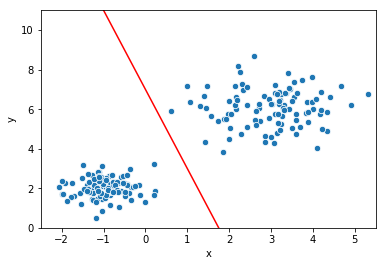

In [26]:
x=np.linspace(-3,6)
sn.scatterplot(Dataset['x'],Dataset['y'], s=40)
plt.plot(x,plot_the_line(w,x), color='red')
plt.xlim(-2.5,5.5)
plt.ylim(-0,11)
plt.show()

## Here we give an example where the classification process takes time, that is when our guess of w is not good enough

In [27]:
w=np.array([-0.5,3.2,-3.5]) # Guess of w, a good one actually
tolerance=1e-20 # The tolerance we choose to stop the iterations
w=find_optimal_w(Dataset,w,dataset['c'],tolerance) # Computing w

print("Final w: {}".format(w)) # Diplaying w# Diplaying w

gradient: [-100.         -297.60944397 -607.95909262] and number of misclassified: 100
gradient: [ -98.         -289.16168955 -599.04625125] and number of misclassified: 98
gradient: [ -74.         -195.97776585 -464.62534106] and number of misclassified: 74
gradient: [ -39.         -83.9324226 -250.9803609] and number of misclassified: 39
gradient: [ -27.          -50.11820261 -174.58760111] and number of misclassified: 27
gradient: [ -23.          -41.57177415 -151.11444982] and number of misclassified: 23
gradient: [-12.         -19.02708566 -83.04337313] and number of misclassified: 12
gradient: [ -9.         -12.03314161 -59.32677874] and number of misclassified: 9
gradient: [ -7.          -8.25778369 -45.44901354] and number of misclassified: 7
gradient: [ -7.          -8.25778369 -45.44901354] and number of misclassified: 7
gradient: [ -7.          -8.25778369 -45.44901354] and number of misclassified: 7
gradient: [ -6.          -6.80508908 -39.38469414] and number of misclassif

gradient: [2.         0.43117736 3.51603454] and number of misclassified: 2
gradient: [ 1.         -0.17325063 -2.40005022] and number of misclassified: 3
gradient: [ 1.         -0.17325063 -2.40005022] and number of misclassified: 3
gradient: [2.         0.43117736 3.51603454] and number of misclassified: 2
gradient: [ 1.         -0.17325063 -2.40005022] and number of misclassified: 3
gradient: [2.         0.43117736 3.51603454] and number of misclassified: 2
gradient: [ 1.         -0.17325063 -2.40005022] and number of misclassified: 3
gradient: [ 1.         -0.17325063 -2.40005022] and number of misclassified: 3
gradient: [2.         0.43117736 3.51603454] and number of misclassified: 2
gradient: [ 1.         -0.17325063 -2.40005022] and number of misclassified: 3
gradient: [ 1.         -0.17325063 -2.40005022] and number of misclassified: 3
gradient: [2.         0.43117736 3.51603454] and number of misclassified: 2
gradient: [ 1.         -0.17325063 -2.40005022] and number of miscl

gradient: [1.         0.23382553 1.86957026] and number of misclassified: 1
gradient: [-0.         -0.37060246 -4.0465145 ] and number of misclassified: 2
gradient: [1.         0.23382553 1.86957026] and number of misclassified: 1
gradient: [1.         0.23382553 1.86957026] and number of misclassified: 1
gradient: [-0.         -0.37060246 -4.0465145 ] and number of misclassified: 2
gradient: [1.         0.23382553 1.86957026] and number of misclassified: 1
gradient: [1.         0.23382553 1.86957026] and number of misclassified: 1
gradient: [-0.         -0.37060246 -4.0465145 ] and number of misclassified: 2
gradient: [1.         0.23382553 1.86957026] and number of misclassified: 1
gradient: [1.         0.23382553 1.86957026] and number of misclassified: 1
gradient: [-0.         -0.37060246 -4.0465145 ] and number of misclassified: 2
gradient: [1.         0.23382553 1.86957026] and number of misclassified: 1
gradient: [1.         0.23382553 1.86957026] and number of misclassified: 1


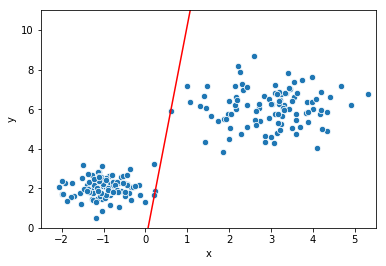

In [29]:
x=np.linspace(-3,6)
sn.scatterplot(Dataset['x'],Dataset['y'], s=40)
plt.plot(x,plot_the_line(w,x), color='red')
plt.xlim(-2.5,5.5)
plt.ylim(-0,11)
plt.show()

In [74]:
def quick_sort_helper(arr,pivot):
    for i in range(len(arr)):
        Restart=False
        if arr[i] <= arr[pivot]:
            pass
        else:
            temp = arr[i]
            arr[i] = arr[pivot-1]
            arr[pivot -1] = arr[pivot]
            arr[pivot] = temp
            Restart=True
            break
    if Restart:
        arr = quick_sort_helper(arr,pivot)
    return arr
        
            
def very_very_quick_sort(arr):
    l = len(arr)
    pivot = len(arr)-1
    for i in range(l):
        if i >= 1:
            arr[:-i] = quick_sort_helper(arr[:-i],pivot-i)
        else:
            arr = quick_sort_helper(arr,pivot-i)
    return arr

In [75]:
a= [110,4,2,7,9,2,12,-56]

In [76]:
quick_sort(a)

[-56, 2, 2, 4, 7, 9, 12, 110]

In [ ]:
locations = {'North America': {'USA': ['Mountain View']}, 'Asia': {'India': ['Bangalore']}, 'North America': {'USA': ['Atlanta']}, 'Africa': {'Egypt': 'Cairo'}, 'Asia': {'China': ['Shanghai']}}


In [5]:
ar=np.array([12.3,4,3.9])

In [6]:
ar

array([12.3,  4. ,  3.9])

In [7]:
ar[None,:]

array([[12.3,  4. ,  3.9]])

In [16]:
np.random.randn(5)

array([-0.00345667, -0.37448701, -1.33237747,  0.04661349,  1.26947331])

## Note that here again, the classification process ended well even though with our eyes we are  not convinced.

In [17]:
np.array_split()

TypeError: array_split() missing 2 required positional arguments: 'ary' and 'indices_or_sections'